<a href="https://colab.research.google.com/github/priyanshunayak05/Neural_Network-Deep_Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regularization** is a set of techniques used in machine learning to prevent overfitting, which occurs when a model learns the training data too well—including its noise and outliers. Overfit models fail to generalize and perform poorly on new, unseen data.



Ridge(l2) and Lasso(l1)

Linear Regression

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [54]:
california_housing=fetch_california_housing()
df=pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
df['target']=california_housing.target

# display(df.head())
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [55]:
dataset=pd.DataFrame(df)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [56]:
# independent features and dependent features
x=dataset
# x=dataset.drop("target",axis=1)

y=df.target

In [57]:
# training and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [58]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02,1.93800
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09,1.69700
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14,2.59800
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1.36100
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45,5.00001
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.29200
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.97800
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.22100
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.83500


In [59]:
# standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [60]:
# linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
mse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
print("mean mse",np.mean(mse))
mse


mean mse -1.0864372837624523e-30


array([-1.08436227e-30, -8.64177161e-31, -5.23850812e-31, -1.67059295e-30,
       -4.82550344e-31, -2.21217138e-30, -1.11914736e-30, -7.48603238e-31,
       -3.32615037e-31, -1.82630228e-30])

In [62]:
# prediction
y_pred=model.predict(x_test)


In [63]:
y_pred

array([0.477  , 0.458  , 5.00001, ..., 2.184  , 1.194  , 2.098  ])

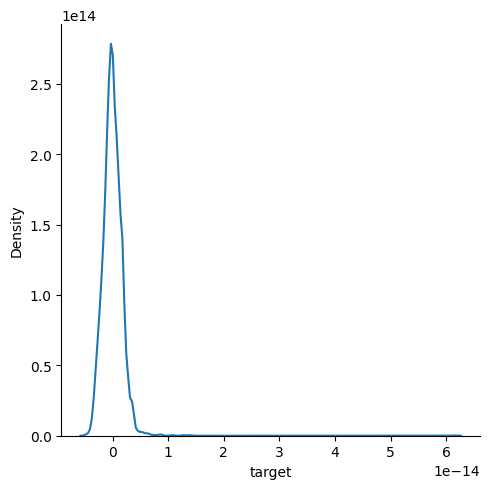

In [64]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [65]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
# r2
score

1.0

A residual error is the difference between an actual, observed value and the value predicted by a model



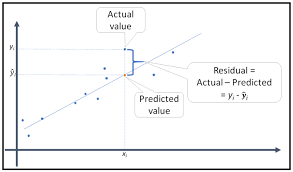

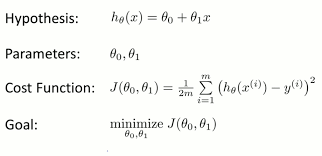




**Ridge:** In machine learning, ridge regression helps reduce overfitting that results from model complexity.

(Ypredict -Y actual )^2 + lamda(slope)^2


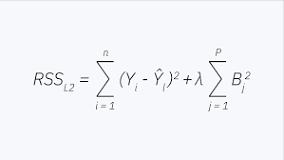

Ridge Regularization


In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [67]:
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [69]:
parameters={'alpha':[1,2,3,5,6,10,40,60,70,80,90,100,500,1000]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 6, 10, 40, 60, 70, 80, 90, 100,
                                   500, 1000]},
             scoring='neg_mean_squared_error')

In [70]:
parameters={'alpha':[1,2,3,5,6,10,40,60,70,80,90,100,500,1000]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 6, 10, 40, 60, 70, 80, 90, 100,
                                   500, 1000]},
             scoring='neg_mean_squared_error')

In [71]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 1}
-2.5854654090254085e-08


In [72]:
ridge_pred=ridgecv.predict(x_test)

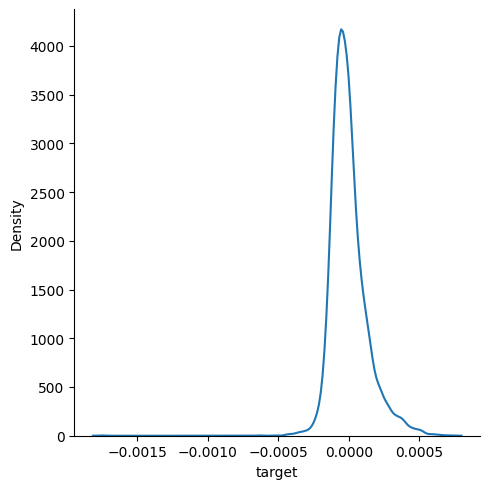

In [74]:
import seaborn as sns
sns.displot(y_test-ridge_pred,kind='kde')

In [75]:
score=r2_score(y_test,ridge_pred)
print(score)

0.9999999873244301


Lasso Regression


In [76]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [78]:
lasso=Lasso()

In [80]:
parameters={'alpha':[1,2,3,5,6,10,40,60,70,80,90,100,500,1000]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 6, 10, 40, 60, 70, 80, 90, 100,
                                   500, 1000]},
             scoring='neg_mean_squared_error')